# Project: Wrangling and Analyze Data

## Data Gathering
**All** three pieces of data for this project will be gathered and loaded through different methods.
1. Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced (1).csv)

In [2]:
# Let's import all neccessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
from IPython.display import Image
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
sns.set_palette("husl", 9)
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
# Loading in the WeRateDogs Twitter archive data
tweet_archive = pd.read_csv("twitter-archive-enhanced (1).csv")

In [3]:
# Let's take a look at the data to see if we loaded it in correctly
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Creating a folder to store downloaded data if it doesn't already exists
folder_name = "image_predictions"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Getting the data from the server using the request library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Storing the file to local server
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
# Checking to see if data is saved in created folder
os.listdir(folder_name)

['image-predictions.tsv']

In [3]:
# Loading in tweet image prediction file
image_predictions = pd.read_csv("image-predictions.tsv", sep="\t")

In [7]:
# Let's take a look at the data
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Querying Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Querying Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [8]:
# Identifying information of interest from JSON stored in txt file and put it in a dataframe
tweet_list = []
with open("tweet-json.txt", "r") as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets["id"]
        retweet_count = tweets["retweet_count"]
        favorite_count = tweets["favorite_count"]
        
        tweet_list.append({"tweet_id": tweet_id, "retweet_count": retweet_count, "favorite_count": favorite_count})
tweet_status = pd.DataFrame(tweet_list, columns = ["tweet_id", "retweet_count", "favorite_count"])

In [9]:
# Let's preview the created dataframe
tweet_status.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section,  at least **eight (8) quality issues and two (2) tidiness issue** are detected and documented using **both** visual assessment programmatic assessement to assess the data.

### `tweet_archive`

In [10]:
# Let's visually assess a sample of the tweet_archive
tweet_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
551,804475857670639616,NaN,NaN,2016-12-02 00:02:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HE'S TRYING TO BE HIS OWN PERSON LET HIM GO 13...,NaN,NaN,NaN,https://twitter.com/bvuepd/status/804417859124...,13,10,None,None,None,None,None
550,804738756058218496,NaN,NaN,2016-12-02 17:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Django. He accidentally opened the fro...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804738756...,12,10,Django,None,None,None,None
1343,704761120771465216,NaN,NaN,2016-03-01 20:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
1325,706166467411222528,NaN,NaN,2016-03-05 17:16:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He's a shy pup. Doesn't bark m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706166467...,7,10,Dexter,None,None,None,None
1394,700002074055016451,NaN,NaN,2016-02-17 17:01:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He covered himself in nanners ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700002074...,9,10,Thumas,None,None,None,None
1826,676440007570247681,NaN,NaN,2015-12-14 16:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hope your Monday isn't too awful. Here's two b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676440007...,11,10,None,None,None,None,None
501,813096984823349248,NaN,NaN,2016-12-25 19:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rocky. He got triple-doggo-dared. Stuc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813096984...,11,10,Rocky,doggo,None,None,None
849,766008592277377025,NaN,NaN,2016-08-17 20:27:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Angel. She stole the @ShopWeRateDogs s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766008592...,11,10,Angel,None,None,None,None
1867,675334060156301312,NaN,NaN,2015-12-11 15:19:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good morning here's a grass pupper. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675334060...,12,10,None,None,None,pupper,None
620,796125600683540480,NaN,NaN,2016-11-08 23:01:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",#ImWithThor 13/10\nhttps://t.co/a18mzkhTf6,NaN,NaN,NaN,https://twitter.com/king5seattle/status/796123...,13,10,None,None,None,None,None


In [11]:
# Checking for more information on the dataframe
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# Checking to see if we have duplicates in the unique tweet_id
tweet_archive.tweet_id.duplicated().sum()

0

In [13]:
# Checking to see how many retweets
tweet_archive.retweeted_status_user_id.count()

181

In [14]:
# Assessing to see highest numerator rating 
tweet_archive.rating_numerator.sort_values(ascending=False)

979     1776
313      960
189      666
188      420
2074     420
        ... 
2335       1
605        1
2038       1
1016       0
315        0
Name: rating_numerator, Length: 2356, dtype: int64

In [15]:
# Assessing to see highest denominator rating 
tweet_archive.rating_denominator.sort_values(ascending=False)

1120    170
902     150
1634    130
1779    120
1635    110
       ... 
776      10
806      10
516       7
2335      2
313       0
Name: rating_denominator, Length: 2356, dtype: int64

In [16]:
# Checking the count denominator rating gretaer than 10, because the rating is x/10
len(tweet_archive[tweet_archive.rating_denominator != 10])

23

In [17]:
# Checking the name column
tweet_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [18]:
# Checking the list of values in the "doggo" column
tweet_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [19]:
# Checking the list of values in the "floofer" column
tweet_archive.floofer.unique()

array(['None', 'floofer'], dtype=object)

In [20]:
# Checking the list of values in the "pupper" column
tweet_archive.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [21]:
# Checking the list of values in the "puppo" column
tweet_archive.puppo.unique()

array(['None', 'puppo'], dtype=object)

### `image_predictions`

In [22]:
# Let's visually assess a sample of the image_predictions
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1064,715360349751484417,https://pbs.twimg.com/media/Ce14cOvWwAAcFJH.jpg,1,nail,0.855552,False,screw,0.073277,False,padlock,0.023970,False
1697,816697700272001025,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg,1,Chihuahua,0.756992,True,Pomeranian,0.052850,True,Maltese_dog,0.047608,True
637,681261549936340994,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,1,Tibetan_terrier,0.382101,True,miniature_poodle,0.095429,True,Maltese_dog,0.065738,True
175,669037058363662336,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,1,Chihuahua,0.803528,True,Pomeranian,0.053871,True,chow,0.032257,True
1042,712438159032893441,https://pbs.twimg.com/media/CeMWubMWwAA6GwF.jpg,1,ice_bear,0.869477,False,Great_Pyrenees,0.069457,True,Labrador_retriever,0.024740,True
275,670838202509447168,https://pbs.twimg.com/media/CU9LyIMWIAA6OOu.jpg,1,flamingo,0.992710,False,coral_fungus,0.003491,False,stinkhorn,0.001859,False
439,674436901579923456,https://pbs.twimg.com/media/CVwUyM9WwAAGDjv.jpg,1,acorn_squash,0.375392,False,Shih-Tzu,0.105416,True,Lhasa,0.072832,True
102,667801013445750784,https://pbs.twimg.com/media/CUSBemVUEAAn-6V.jpg,1,flat-coated_retriever,0.508392,True,Chesapeake_Bay_retriever,0.262239,True,curly-coated_retriever,0.048920,True
225,670338931251150849,https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg,1,cairn,0.245033,True,West_Highland_white_terrier,0.137709,True,miniature_schnauzer,0.089173,True
1019,710140971284037632,https://pbs.twimg.com/media/Cdrtcr-W4AAqi5H.jpg,1,Pekinese,0.953170,True,papillon,0.019517,True,Japanese_spaniel,0.005821,True


In [23]:
# Checking for more information on the dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# Let's see some statistics
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
# Let´s see a image form the tweet_id=670833812859932673
Image(url = "https://pbs.twimg.com/media/CU9HyzSWIAAVcte.jpg")

In [26]:
# Checking to see if we have duplicates in the unique tweet_id
image_predictions.tweet_id.duplicated().sum()

0

In [27]:
# Checking to see if we have duplicates in the image url
image_predictions.jpg_url.duplicated().sum()

66

In [28]:
# Let's see how many numbers of images are contained
image_predictions.img_num.unique()

array([1, 4, 2, 3], dtype=int64)

In [29]:
# Let's see the count of the different dog types from the first prediction
image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [30]:
# Let's see the count of the different dog types from the second prediction
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [31]:
# Let's see the count of the different dog types from the third prediction
image_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [32]:
# Let's see the unique list of dog types from the first prediction
list(image_predictions.p1.unique())

['Welsh_springer_spaniel',
 'redbone',
 'German_shepherd',
 'Rhodesian_ridgeback',
 'miniature_pinscher',
 'Bernese_mountain_dog',
 'box_turtle',
 'chow',
 'shopping_cart',
 'miniature_poodle',
 'golden_retriever',
 'Gordon_setter',
 'Walker_hound',
 'pug',
 'bloodhound',
 'Lhasa',
 'English_setter',
 'hen',
 'desktop_computer',
 'Italian_greyhound',
 'Maltese_dog',
 'three-toed_sloth',
 'ox',
 'malamute',
 'guinea_pig',
 'soft-coated_wheaten_terrier',
 'Chihuahua',
 'black-and-tan_coonhound',
 'coho',
 'toy_terrier',
 'Blenheim_spaniel',
 'Pembroke',
 'llama',
 'Chesapeake_Bay_retriever',
 'curly-coated_retriever',
 'dalmatian',
 'Ibizan_hound',
 'Border_collie',
 'Labrador_retriever',
 'seat_belt',
 'snail',
 'miniature_schnauzer',
 'Airedale',
 'triceratops',
 'swab',
 'hay',
 'hyena',
 'jigsaw_puzzle',
 'West_Highland_white_terrier',
 'toy_poodle',
 'giant_schnauzer',
 'vizsla',
 'vacuum',
 'Rottweiler',
 'Siberian_husky',
 'teddy',
 'papillon',
 'Saint_Bernard',
 'porcupine',
 'go

In [33]:
# Let's see the unique list of dog types from the second prediction
list(image_predictions.p2.unique())

['collie',
 'miniature_pinscher',
 'malinois',
 'redbone',
 'Rottweiler',
 'English_springer',
 'mud_turtle',
 'Tibetan_mastiff',
 'shopping_basket',
 'komondor',
 'Yorkshire_terrier',
 'English_foxhound',
 'bull_mastiff',
 'German_shepherd',
 'Shih-Tzu',
 'Newfoundland',
 'cock',
 'desk',
 'toy_terrier',
 'toy_poodle',
 'otter',
 'Chesapeake_Bay_retriever',
 'Siberian_husky',
 'skunk',
 'Afghan_hound',
 'bloodhound',
 'barracouta',
 'papillon',
 'cocker_spaniel',
 'chow',
 'Irish_terrier',
 'chain_saw',
 'beagle',
 'giant_schnauzer',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'Weimaraner',
 'slug',
 'Brittany_spaniel',
 'standard_schnauzer',
 'teddy',
 'armadillo',
 'African_hunting_dog',
 'vizsla',
 'doormat',
 'pug',
 'Italian_greyhound',
 'Samoyed',
 'Pomeranian',
 'miniature_poodle',
 'Lakeland_terrier',
 'Irish_setter',
 'swab',
 'malamute',
 'bath_towel',
 'Border_collie',
 'Leonberg',
 'drake',
 'French_bulldog',
 'ice_bear',
 'Christmas_stocking',
 'golden_retriever',


In [34]:
# Let's see the unique list of dog types from the third prediction
list(image_predictions.p3.unique())

['Shetland_sheepdog',
 'Rhodesian_ridgeback',
 'bloodhound',
 'miniature_pinscher',
 'Doberman',
 'Greater_Swiss_Mountain_dog',
 'terrapin',
 'fur_coat',
 'golden_retriever',
 'soft-coated_wheaten_terrier',
 'Labrador_retriever',
 'Pekinese',
 'Ibizan_hound',
 'French_bulldog',
 'malinois',
 'Dandie_Dinmont',
 'borzoi',
 'partridge',
 'bookcase',
 'basenji',
 'miniature_poodle',
 'great_grey_owl',
 'groenendael',
 'Eskimo_dog',
 'hamster',
 'briard',
 'papillon',
 'flat-coated_retriever',
 'gar',
 'Chihuahua',
 'Shih-Tzu',
 'Pomeranian',
 'dingo',
 'power_drill',
 'Saluki',
 'Great_Pyrenees',
 'West_Highland_white_terrier',
 'collie',
 'toy_poodle',
 'vizsla',
 'acorn',
 'giant_schnauzer',
 'teddy',
 'common_iguana',
 'wig',
 'water_buffalo',
 'coyote',
 'seat_belt',
 'kelpie',
 'space_heater',
 'Brabancon_griffon',
 'standard_poodle',
 'beagle',
 'Irish_water_spaniel',
 'bluetick',
 'Weimaraner',
 'Chesapeake_Bay_retriever',
 'toilet_tissue',
 'black-and-tan_coonhound',
 'kuvasz',
 'C

In [35]:
# How many are said to be dogs from the first prediction
image_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [36]:
# How many are said to be dogs from the second prediction
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [37]:
# How many are said to be dogs from the third prediction
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### `tweet_status`

In [38]:
# Let's visually assess a sample of the tweet_status
tweet_status.sample(10)

,tweet_id,retweet_count,favorite_count
534,807059379405148160,8521,0
1052,742423170473463808,4319,10812
913,757354760399941633,1637,4995
1194,717047459982213120,2135,6826
1732,679736210798047232,918,2311
1019,746726898085036033,2037,6648
981,749395845976588288,3951,9488
63,879674319642796034,10,315
1492,692568918515392513,1737,4739
920,756275833623502848,1738,7114


In [39]:
# Checking for more information on the dataframe
tweet_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [40]:
# Let's see some statistics
tweet_status.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [41]:
# Checking to see if we have duplicates in the unique tweet_id
tweet_status.tweet_id.duplicated().sum()

0

### Quality issues
`tweet_archive`

1. Retweets are present, want only original tweets

2. Multiple null variables in different columns 

3. Null values represented as none in doggo, floofer, pupper, puppo columns

4. Incorrect data type for timestamp

5. 23 rows with denominator != 10

6. Dog names like "None", "a"

`image_predictions`

1. Duplicate variables present in jpg_url

2. Inconsistent dog name format in p1, p2, p3 columns 

3. Non-descriptive column names (p1, p2, p3, p1_conf, p2_conf, p3_conf)

4. A number of tweets that do not refer to dog ratings

### Tidiness issues
1. Information on the tweet are in 3 tables

2. Text column contains repetitive information

3. 4 variables contained in 4 columns (doggo, floofer, pupper, puppo)

## Cleaning Data
In this section, we will clean **all** of the issues documented while assessing. 

In [42]:
# Making copies of original pieces of data
tweet_archive_clean = tweet_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_status_clean = tweet_status.copy()

### Issue #1: Retweets are present, we want only original tweets

#### Define: Remove retweets by dropping rows with retweeted_status ids

#### Code

In [43]:
# Filtering to exclude retweets
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.retweeted_status_id.isnull()]

#### Test

In [44]:
# Checking to see if retweets are no longer present
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #2: Multiple null variables in different columns

#### Define
Drop the following columns `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls`

#### Code

In [45]:
# Dropping unwanted columnswith the .drop method
tweet_archive_clean.drop(columns=["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", 
                                  "retweeted_status_user_id", "retweeted_status_timestamp", "expanded_urls"], 
                                   axis=1, inplace=True)

#### Test

In [46]:
# Let see if there are any columns with missing values
tweet_archive_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #3: Null values represented as none in doggo, floofer, pupper, puppo columns

#### Define
Convert none variables in `doggo, floofer, pupper, puppo` columns to `null` using for loop and replace function

#### Code

In [47]:
# Looping through the columns to change the None to null
dog_col = ["doggo", "pupper", "floofer", "puppo"]
for val in dog_col:
       tweet_archive_clean[val] = tweet_archive_clean[val].replace("None", np.nan)

#### Test

In [48]:
# Checking data to confirm replacing is done 
tweet_archive_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2002,672481316919734272,2015-12-03 18:23:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,12,10,Jazz,NaN,NaN,pupper,NaN
2283,667200525029539841,2015-11-19 04:39:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Joshwa. He is a fuckboy supreme. He cl...,11,10,Joshwa,NaN,NaN,NaN,NaN
1624,684880619965411328,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,5,10,None,NaN,NaN,pupper,NaN
527,808733504066486276,2016-12-13 18:01:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper in a onesie. Quite pupset abou...,12,10,None,NaN,NaN,pupper,NaN
471,816697700272001025,2017-01-04 17:27:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Binky. She appears to be rather h*ckin...,12,10,Binky,NaN,NaN,NaN,NaN


### Issue #4: 4 variables contained in 4 columns (doggo, floofer, pupper, puppo)

#### Define
Melt the `doggo, floofer, pupper, puppo` columns to a dog stage column.

#### Code

In [49]:
# Melting the doggo, floofer, pupper, puppo columns into dog_stages 
tweet_archive_clean = pd.melt(tweet_archive_clean, 
                     id_vars=["tweet_id", "timestamp", "source", "text", "rating_numerator", "rating_denominator", "name"],
                     value_vars=["doggo", "floofer", "pupper", "puppo"], var_name=["dog_class"], value_name="dog_stage")       
tweet_archive_clean.drop(columns="dog_class", axis=1, inplace=True)

#### Test

In [50]:
# Let's see a sample of melting performed
tweet_archive_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
5886,680221482581123072,2015-12-25 03:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is CeCe. She's patiently waiting for Sant...,10,10,CeCe,NaN
1330,691459709405118465,2016-01-25 03:16:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Leo. He's a Fallopian Puffalope. ...,12,10,Leo,NaN
1633,676811746707918848,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Penny &amp; Gizmo. They are pract...,9,10,Penny,NaN
584,782969140009107456,2016-10-03 15:42:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cali. She arrived preassembled. Conven...,12,10,Cali,NaN
828,747844099428986880,2016-06-28 17:28:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Huxley. He's pumped for #BarkWeek. Eve...,11,10,Huxley,NaN


In [51]:
# Checking count of dog_stage column
tweet_archive_clean.dog_stage.value_counts()

pupper     234
doggo       87
puppo       25
floofer     10
Name: dog_stage, dtype: int64

### Issue #5: Information on the tweets are in three tables

#### Define
Merge `tweet_archive_clean, image_predictions_clean, tweet_status_clean` tables

#### Code

In [52]:
# Using merge function to merge tweet_archive_clean, image_predictions_clean, tweet_status_clean tables
df = pd.merge(pd.merge(tweet_archive_clean, image_predictions_clean, on="tweet_id"), tweet_status_clean, on="tweet_id")

#### Test

In [53]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

### Issue #6: `text` column contains repetitive information

#### Define
Drop text column as we have already extracted needed information. Drop source column too as it not needed.

#### Code

In [54]:
# Dropping unwanted columns
df.drop(columns=["text", "source"], axis=1, inplace=True)

#### Test

In [55]:
# Let's see the changes
df.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
2,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
3,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
4,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819


### Issue #7: Duplicate variables present in jpg_url

#### Define
Select duplicates in `jpg_url` and drop them using the _drop_duplicates function_

#### Code

In [56]:
# Dropping duplicaate values in jpg_url column
df.drop_duplicates(subset=["jpg_url"], inplace=True)

#### Test

In [57]:
# Checking to see if there are any duplicates
df.jpg_url.duplicated().sum()

0

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 7972
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   rating_numerator    1994 non-null   int64  
 3   rating_denominator  1994 non-null   int64  
 4   name                1994 non-null   object 
 5   dog_stage           74 non-null     object 
 6   jpg_url             1994 non-null   object 
 7   img_num             1994 non-null   int64  
 8   p1                  1994 non-null   object 
 9   p1_conf             1994 non-null   float64
 10  p1_dog              1994 non-null   bool   
 11  p2                  1994 non-null   object 
 12  p2_conf             1994 non-null   float64
 13  p2_dog              1994 non-null   bool   
 14  p3                  1994 non-null   object 
 15  p3_conf             1994 non-null   float64
 16  p3_dog

### Issue #8: Incorrect data type for _timestamp_

#### Define
Convert _timestamp_ to `datetime` and create columns _day, month and  year_ then drop _timestamp_

#### Code

In [59]:
# Converting timestamp to datetime and dropping the timestamp column
df.timestamp = pd.to_datetime(df.timestamp)
df["year"] = df.timestamp.dt.year
df["month"] = df.timestamp.dt.month
df["weekday"] = df.timestamp.dt.day_name()
df.drop(columns="timestamp", axis=1, inplace=True)

#### Test

In [60]:
# Let's take a look at the new columns created
df.head()

,tweet_id,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,year,month,weekday
0,892420643555336193,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,...,0.085851,False,banana,0.076110,False,8853,39467,2017,8,Tuesday
4,892177421306343426,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,...,0.090647,True,papillon,0.068957,True,6514,33819,2017,8,Tuesday
8,891815181378084864,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,...,0.078253,True,kelpie,0.031379,True,4328,25461,2017,7,Monday
12,891689557279858688,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,...,0.168086,True,spatula,0.040836,False,8964,42908,2017,7,Sunday
16,891327558926688256,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,2017,7,Saturday


### Issue #9:  23 rows with denominator != 10

#### Define
Drop rows with denominator rating greater or less than 10 then drop the column

#### Code

In [61]:
# Selecting rows where rating_denominator isn't equal to 10 then dropping the column
df = df.loc[df["rating_denominator"] == 10]
df.drop(columns="rating_denominator", axis=1, inplace=True)

#### Test

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 7972
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1976 non-null   int64  
 1   rating_numerator  1976 non-null   int64  
 2   name              1976 non-null   object 
 3   dog_stage         74 non-null     object 
 4   jpg_url           1976 non-null   object 
 5   img_num           1976 non-null   int64  
 6   p1                1976 non-null   object 
 7   p1_conf           1976 non-null   float64
 8   p1_dog            1976 non-null   bool   
 9   p2                1976 non-null   object 
 10  p2_conf           1976 non-null   float64
 11  p2_dog            1976 non-null   bool   
 12  p3                1976 non-null   object 
 13  p3_conf           1976 non-null   float64
 14  p3_dog            1976 non-null   bool   
 15  retweet_count     1976 non-null   int64  
 16  favorite_count    1976 non-null   int64  


### Issue #10:  Inconsistent dog name format in p1, p2, p3 columns

#### Define
Convert these names to lower case format

#### Code

In [63]:
# Looping through p1, p2, p3 columns to convert values to lower case
cols = ["p1", "p2", "p3"]
for val in cols:
       df[val] = df[val].str.lower()

#### Test

In [64]:
# Checking through the columns to see if changes are made
print("p1 column\n", df.p1.value_counts())
print("\np2 column\n",  df.p2.value_counts())
print("\np3 column\n",  df.p3.value_counts())

p1 column
 golden_retriever      135
labrador_retriever     92
pembroke               88
chihuahua              79
pug                    54
                     ... 
hammer                  1
nail                    1
timber_wolf             1
espresso                1
desktop_computer        1
Name: p1, Length: 374, dtype: int64

p2 column
 labrador_retriever          96
golden_retriever            80
cardigan                    73
chihuahua                   41
chesapeake_bay_retriever    40
                            ..
minibus                      1
screw                        1
coffee_mug                   1
sombrero                     1
mud_turtle                   1
Name: p2, Length: 398, dtype: int64

p3 column
 labrador_retriever    74
chihuahua             57
golden_retriever      45
eskimo_dog            35
kelpie                33
                      ..
passenger_car          1
bannister              1
rotisserie             1
king_penguin           1
partridge       


### Issue #11:  Non-descriptive column names (p1, p2, p3, p1_conf, p2_conf, p3_conf)

#### Define
Use the rename function to give a more descriptive name to the `p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog` columns

#### Code

In [65]:
# Changing column names with rename function
df.rename(columns={"p1":"first_prediction", "p1_conf": "first_confidence", "p1_dog": "first_dog",
                    "p2": "second_prediction", "p2_conf": "second_confidence", "p2_dog": "second_dog",
                    "p3": "third_prediction", "p3_conf": "third_confidence", "p3_dog": "third_dog"}, inplace=True)

#### Test

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 7972
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           1976 non-null   int64  
 1   rating_numerator   1976 non-null   int64  
 2   name               1976 non-null   object 
 3   dog_stage          74 non-null     object 
 4   jpg_url            1976 non-null   object 
 5   img_num            1976 non-null   int64  
 6   first_prediction   1976 non-null   object 
 7   first_confidence   1976 non-null   float64
 8   first_dog          1976 non-null   bool   
 9   second_prediction  1976 non-null   object 
 10  second_confidence  1976 non-null   float64
 11  second_dog         1976 non-null   bool   
 12  third_prediction   1976 non-null   object 
 13  third_confidence   1976 non-null   float64
 14  third_dog          1976 non-null   bool   
 15  retweet_count      1976 non-null   int64  
 16  favorite_count     1976 

### Issue #12:  A number of tweets that do not refer to dog ratings

#### Define
Select ratings that are true for dog_type across all 3 confidence columns

#### Code

In [67]:
# Filtering through to select ratings that are true for dog_type across all 3 confidence columns
df = df.loc[(df["first_dog"] == True) & (df["second_dog"] == True) & (df["third_dog"] == True)] 

#### Test

In [68]:
# Checking first_prediction column through visual assesment to make sure ratings refer to dog types
list(df.first_prediction.unique())

['chihuahua',
 'basset',
 'pomeranian',
 'irish_terrier',
 'pembroke',
 'samoyed',
 'french_bulldog',
 'golden_retriever',
 'whippet',
 'siberian_husky',
 'kuvasz',
 'blenheim_spaniel',
 'pug',
 'malamute',
 'italian_greyhound',
 'chow',
 'german_shepherd',
 'doberman',
 'labrador_retriever',
 'saluki',
 'miniature_pinscher',
 'english_springer',
 'vizsla',
 'chesapeake_bay_retriever',
 'bloodhound',
 'bernese_mountain_dog',
 'west_highland_white_terrier',
 'cocker_spaniel',
 'flat-coated_retriever',
 'cardigan',
 'newfoundland',
 'shetland_sheepdog',
 'greater_swiss_mountain_dog',
 'border_collie',
 'eskimo_dog',
 'bull_mastiff',
 'staffordshire_bullterrier',
 'australian_terrier',
 'bedlington_terrier',
 'old_english_sheepdog',
 'black-and-tan_coonhound',
 'great_dane',
 'yorkshire_terrier',
 'airedale',
 'giant_schnauzer',
 'dandie_dinmont',
 'irish_water_spaniel',
 'afghan_hound',
 'brittany_spaniel',
 'leonberg',
 'border_terrier',
 'great_pyrenees',
 'american_staffordshire_terri

In [69]:
# Checking second_prediction column through visual assesment to make sure ratings refer to dog types
list(df.second_prediction.unique())

['pekinese',
 'malamute',
 'english_springer',
 'eskimo_dog',
 'irish_setter',
 'cardigan',
 'pomeranian',
 'boxer',
 'labrador_retriever',
 'borzoi',
 'tibetan_mastiff',
 'pug',
 'redbone',
 'rhodesian_ridgeback',
 'great_pyrenees',
 'chihuahua',
 'shih-tzu',
 'siberian_husky',
 'american_staffordshire_terrier',
 'norwich_terrier',
 'french_bulldog',
 'malinois',
 'miniature_pinscher',
 'chesapeake_bay_retriever',
 'afghan_hound',
 'beagle',
 'boston_bull',
 'whippet',
 'collie',
 'italian_greyhound',
 'irish_terrier',
 'saint_bernard',
 'staffordshire_bullterrier',
 'miniature_poodle',
 'black-and-tan_coonhound',
 'pembroke',
 'bloodhound',
 'sussex_spaniel',
 'flat-coated_retriever',
 'golden_retriever',
 'appenzeller',
 'kuvasz',
 'groenendael',
 'toy_poodle',
 'tibetan_terrier',
 'doberman',
 'otterhound',
 'brabancon_griffon',
 'bull_mastiff',
 'maltese_dog',
 'newfoundland',
 'greater_swiss_mountain_dog',
 'papillon',
 'leonberg',
 'saluki',
 'blenheim_spaniel',
 'cocker_spaniel

In [70]:
# Checking third_prediction column through visual assesment to make sure ratings refer to dog types
list(df.third_prediction.unique())

['papillon',
 'kelpie',
 'german_short-haired_pointer',
 'pembroke',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'basenji',
 'staffordshire_bullterrier',
 'redbone',
 'saluki',
 'labrador_retriever',
 'english_setter',
 'malamute',
 'bull_mastiff',
 'weimaraner',
 'beagle',
 'dandie_dinmont',
 'boston_bull',
 'bernese_mountain_dog',
 'kuvasz',
 'eskimo_dog',
 'norfolk_terrier',
 'brabancon_griffon',
 'norwegian_elkhound',
 'newfoundland',
 'flat-coated_retriever',
 'cardigan',
 'cocker_spaniel',
 'golden_retriever',
 'american_staffordshire_terrier',
 'ibizan_hound',
 'appenzeller',
 'toy_terrier',
 'tibetan_mastiff',
 'greater_swiss_mountain_dog',
 'vizsla',
 'great_pyrenees',
 'toy_poodle',
 'standard_poodle',
 'pomeranian',
 'bloodhound',
 'entlebucher',
 'saint_bernard',
 'dalmatian',
 'collie',
 'curly-coated_retriever',
 'pug',
 'keeshond',
 'siberian_husky',
 'boxer',
 'german_shepherd',
 'pekinese',
 'french_bulldog',
 'lakeland_terrier',
 'groenendael',
 'japanese_spa

### Issue #13:  Dog names like "None", "a"

#### Define
Remove rows with unusual dog_names through filtering with .loc

#### Code

In [71]:
# Filtering rows to select dog names that are not "none" and "or"
df = df.loc[(df["name"] != "None") & (df["name"] != "a")]

#### Test

In [72]:
# Let's see the changes made
df.name.value_counts()

Cooper     9
Charlie    8
Oliver     7
Sadie      6
the        6
          ..
Loomis     1
Mairi      1
Stormy     1
Dallas     1
Walter     1
Name: name, Length: 643, dtype: int64

## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
df.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analysis and visualization is made on the wrangled data.

In [74]:
# Reading in the cleaned dataset
df_clean = pd.read_csv("twitter_archive_master.csv")

Let's see how the data looks

In [75]:
df_clean.head()

,tweet_id,rating_numerator,name,dog_stage,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count,year,month,weekday
0,892177421306343426,13,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819,2017,8,Tuesday
1,891815181378084864,12,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,2017,7,Monday
2,891327558926688256,12,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048,2017,7,Saturday
3,890609185150312448,13,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,4429,28226,2017,7,Thursday
4,890240255349198849,14,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,7711,32467,2017,7,Wednesday


In [76]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           872 non-null    int64  
 1   rating_numerator   872 non-null    int64  
 2   name               872 non-null    object 
 3   dog_stage          26 non-null     object 
 4   jpg_url            872 non-null    object 
 5   img_num            872 non-null    int64  
 6   first_prediction   872 non-null    object 
 7   first_confidence   872 non-null    float64
 8   first_dog          872 non-null    bool   
 9   second_prediction  872 non-null    object 
 10  second_confidence  872 non-null    float64
 11  second_dog         872 non-null    bool   
 12  third_prediction   872 non-null    object 
 13  third_confidence   872 non-null    float64
 14  third_dog          872 non-null    bool   
 15  retweet_count      872 non-null    int64  
 16  favorite_count     872 non

In [77]:
df_clean.shape

(872, 20)

### #1. What are the most common dog breeds?

In [78]:
# Let's see the most common dog breeds
top_breeds = df_clean.first_prediction.value_counts().head(10)
top_breeds

golden_retriever      79
pembroke              57
labrador_retriever    51
chihuahua             38
pug                   28
pomeranian            20
toy_poodle            20
malamute              19
chow                  19
french_bulldog        17
Name: first_prediction, dtype: int64

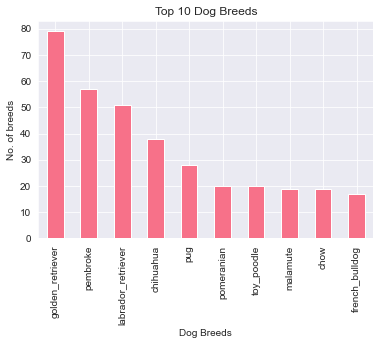

In [79]:
# Let's plot that information in a bar chart
top_breeds.plot(kind="bar")
plt.title("Top 10 Dog Breeds")
plt.xlabel("Dog Breeds")
plt.ylabel("No. of breeds");

**The most common dog breeds are:** _golden_retriever, pembroke, labrador_retriever, chihuahua, pug, pomeranian, toy_poodle, malamute, chow and french_bulldog_

---
Let's see a picture of the most common breed, golden_retriever

In [80]:
golden_df = df.query('first_prediction == "golden_retriever"')
golden_df.head(3)

,tweet_id,rating_numerator,name,dog_stage,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog,retweet_count,favorite_count,year,month,weekday
56,889531135344209921,13,Stuart,NaN,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,labrador_retriever,0.013834,True,redbone,0.007958,True,2321,15359,2017,7,Monday
64,888917238123831296,12,Jim,NaN,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,tibetan_mastiff,0.120184,True,labrador_retriever,0.105506,True,4709,29611,2017,7,Sunday
68,888804989199671297,13,Zeke,NaN,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,labrador_retriever,0.184172,True,english_setter,0.073482,True,4559,26080,2017,7,Saturday


In [81]:
sample_golden = df.jpg_url[68]
Image(url=sample_golden)

### What are the most common dog names?

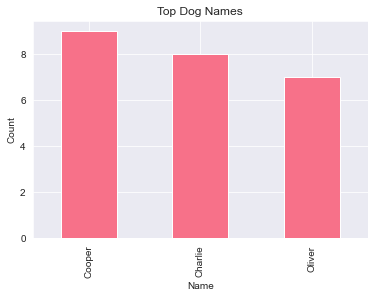

In [82]:
# Selecting the top 3 names and visualizing with a bar chart
top_names = df_clean.name.value_counts()
top_names.head(3).plot(kind="bar")
plt.title("Top Dog Names")
plt.xlabel("Name")
plt.ylabel("Count");

**The most common dog names are:**  _Cooper, Charlie, Oliver_

### What kind of relationship exists between retweets & favourite counts

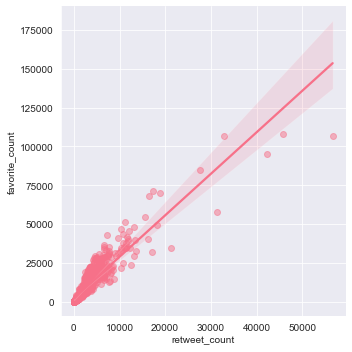

In [83]:
# Using seaborn's lmplot to see the correlation between retweets and favourite counts
sns.lmplot(x="retweet_count", y="favorite_count", data=df, scatter_kws={'alpha':2/4});

There seems to be a positive correlation between retweet and favorite counts

### What is the trend between retweet and favourite counts over the years

In [84]:
trend = df.groupby(df["year"]).mean()[["retweet_count", "favorite_count"]]
trend

,retweet_count,favorite_count
year,,
2015,1029.825893,2536.995536
2016,2436.172566,7562.457965
2017,5818.137755,23533.193878


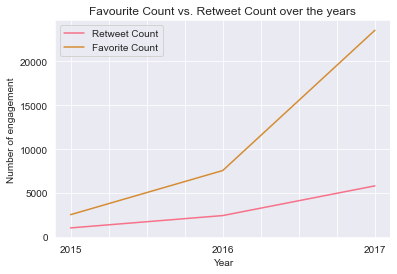

In [85]:
trend = df.groupby(df["year"]).mean()[["retweet_count", "favorite_count"]]
trend.reset_index(inplace=True)
trend["year"] = trend["year"].astype(str)
trend.plot(x="year")
plt.title("Favourite Count vs. Retweet Count over the years")
plt.xlabel("Year")
plt.ylabel("Number of engagement")
plt.legend(["Retweet Count", "Favorite Count"]);

The number of retweets and favourite counts increases over the years

### Insights:
1. **The most common dog breeds are:** _golden_retriever, pembroke, labrador_retriever, chihuahua, pug, pomeranian, toy_poodle, malamute, chow and french_bulldog_

2. **The most common dog names are:**  _Cooper, Charlie, Oliver_

3. There seems to be a positive between correlation retweet and favorite counts

4. The number of retweets and favourite counts increases over the years